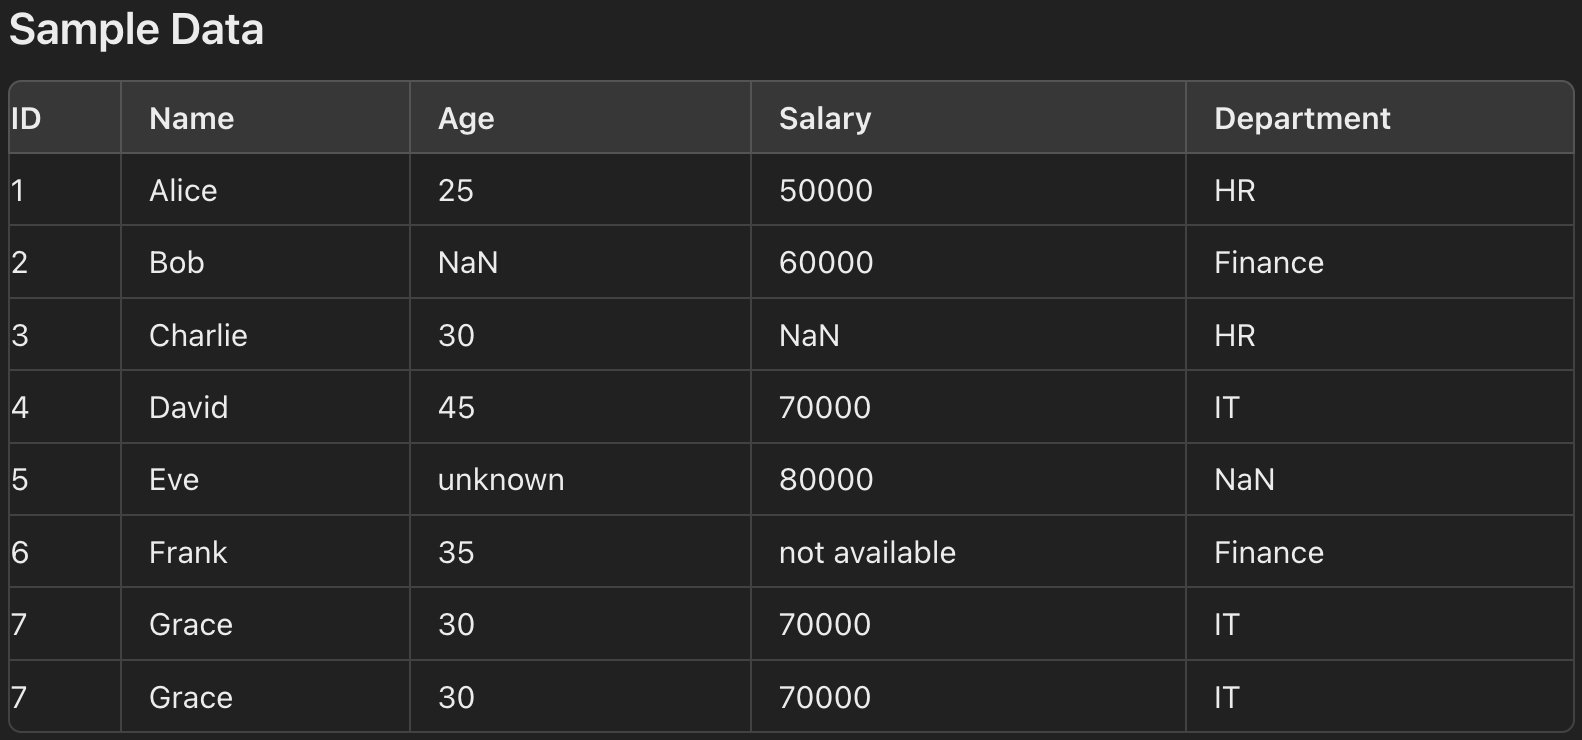

In [3]:
from IPython.display import Image
Image("Dataset Img DataCleaning.png")# path and name



## Tasks 
### 1. Load the Dataset
#### Task: Load/Create the dataset into a DataFrame and display the first few rows. 

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 7],
    'Name': ['Alice', 'Bob', 'Charlie', np.nan, 'Eve', 'Frank', 'Grace', 'Grace'],
    'Age': [25, np.nan, 30, 45, 'unknown', 35, 30, 30],
    'Salary': [50000, 60000, np.nan, 70000, 80000, 'not available', 70000, 70000],
    'Department': ['HR', 'Finance', 'HR', 'IT', np.nan, 'Finance', 'IT', 'IT']
}
df = pd.DataFrame(data)
df
# Display the first few rows
#df.head(7)
df.describe()

#df['head'].fillna('Unknown' ,inplace='TRUE')

,ID
count,8.000000
mean,4.375000
std,2.263846
min,1.000000
25%,2.750000
50%,4.500000
75%,6.250000
max,7.000000


## 2. Identify Missing Values
Task: Find and display the count of missing values in each column.

In [65]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


ID            0
Name          1
Age           1
Salary        1
Department    1
dtype: int64

## 3. Handle Missing Values
Task: Handle missing values as follows:

- Fill missing values in the Name column with 'Unknown'.
- Convert the Age and Salary columns to numeric, coercing errors to NaN.
- Fill missing values in the Department column with 'Unknown'.

In [66]:
# Fill missing values

df['Name'].fillna('Unknown', inplace=True) # fillna() -> find NaN and replace with another value

# Display the DataFrame after handling missing values
df.head(8)


,ID,Name,Age,Salary,Department
0,1,Alice,25,50000,HR
1,2,Bob,NaN,60000,Finance
2,3,Charlie,30,NaN,HR
3,4,Unknown,45,70000,IT
4,5,Eve,unknown,80000,NaN
5,6,Frank,35,not available,Finance
6,7,Grace,30,70000,IT
7,7,Grace,30,70000,IT


In [67]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') # find unknown and replace with Nan
df

,ID,Name,Age,Salary,Department
0,1,Alice,25.0,50000,HR
1,2,Bob,NaN,60000,Finance
2,3,Charlie,30.0,NaN,HR
3,4,Unknown,45.0,70000,IT
4,5,Eve,NaN,80000,NaN
5,6,Frank,35.0,not available,Finance
6,7,Grace,30.0,70000,IT
7,7,Grace,30.0,70000,IT


In [68]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df

,ID,Name,Age,Salary,Department
0,1,Alice,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance
2,3,Charlie,30.0,NaN,HR
3,4,Unknown,45.0,70000.0,IT
4,5,Eve,NaN,80000.0,NaN
5,6,Frank,35.0,NaN,Finance
6,7,Grace,30.0,70000.0,IT
7,7,Grace,30.0,70000.0,IT


In [69]:
df['Department'].fillna('Unknown', inplace=True)# fillna() -> 
df

,ID,Name,Age,Salary,Department
0,1,Alice,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance
2,3,Charlie,30.0,NaN,HR
3,4,Unknown,45.0,70000.0,IT
4,5,Eve,NaN,80000.0,Unknown
5,6,Frank,35.0,NaN,Finance
6,7,Grace,30.0,70000.0,IT
7,7,Grace,30.0,70000.0,IT


## 4. Convert Data Types
Task: Ensure that Age and Salary columns are of numeric data types and correct any inconsistencies.

In [70]:
# Convert Age and Salary columns to numeric

df['Age'] = pd.to_numeric(df['Age'], errors='coerce') # pd.to_numeric()
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df
# Display the data types
#df.dtypes


,ID,Name,Age,Salary,Department
0,1,Alice,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance
2,3,Charlie,30.0,NaN,HR
3,4,Unknown,45.0,70000.0,IT
4,5,Eve,NaN,80000.0,Unknown
5,6,Frank,35.0,NaN,Finance
6,7,Grace,30.0,70000.0,IT
7,7,Grace,30.0,70000.0,IT


## 5. Remove Duplicates
Task: Remove duplicate rows based on the ID column and display the cleaned DataFrame.

In [72]:
# Remove duplicate rows based on ID
df = df.drop_duplicates(subset='ID')# drop_duplicates(subset ='Employee Code')

# Display the DataFrame after removing duplicates
df.head(10)


,ID,Name,Age,Salary,Department
0,1,Alice,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance
2,3,Charlie,30.0,NaN,HR
3,4,Unknown,45.0,70000.0,IT
4,5,Eve,NaN,80000.0,Unknown
5,6,Frank,35.0,NaN,Finance
6,7,Grace,30.0,70000.0,IT


## 6. Handle Outliers
Task: Detect and remove outliers in the Salary column using the Z-score method.

In [9]:
from scipy import stats

# Calculate Z-scores
df['Salary_zscore'] = stats.zscore(df['Salary'].fillna(df['Salary'].mean()))

# Define a threshold for outliers
threshold = 3

# Identify outliers
df_outliers = df[df['Salary_zscore'].abs() > threshold]

# Remove outliers
df_cleaned = df[df['Salary_zscore'].abs() <= threshold]

# Display the DataFrames for outliers and cleaned data
df_outliers, df_cleaned


(Empty DataFrame
 Columns: [ID, Name, Age, Salary, Department, Salary_zscore]
 Index: [],
    ID     Name   Age   Salary Department  Salary_zscore
 0   1    Alice  25.0  50000.0         HR      -1.856382
 1   2      Bob   NaN  60000.0    Finance      -0.696143
 2   3  Charlie  30.0      NaN         HR       0.000000
 3   4  Unknown  45.0  70000.0         IT       0.464095
 4   5      Eve   NaN  80000.0    Unknown       1.624334
 5   6    Frank  35.0      NaN    Finance       0.000000
 6   7    Grace  30.0  70000.0         IT       0.464095)

## 7. Validate Data
Task: Validate the cleaned data to ensure Age and Salary are greater than 0.

In [10]:
# Validate data
valid_data = df_cleaned[df_cleaned['Age'] > 0]
valid_data = valid_data[valid_data['Salary'] > 0]

# Display the validated data
valid_data


,ID,Name,Age,Salary,Department,Salary_zscore
0,1,Alice,25.0,50000.0,HR,-1.856382
3,4,Unknown,45.0,70000.0,IT,0.464095
6,7,Grace,30.0,70000.0,IT,0.464095
